Principal Component Analysis (PCA) is perhaps one of the most broadly used of unsupervised algorithms. PCA is fundamentally a
dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

plt.rcParams['figure.figsize'] = (16, 8)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.0044138302291827)

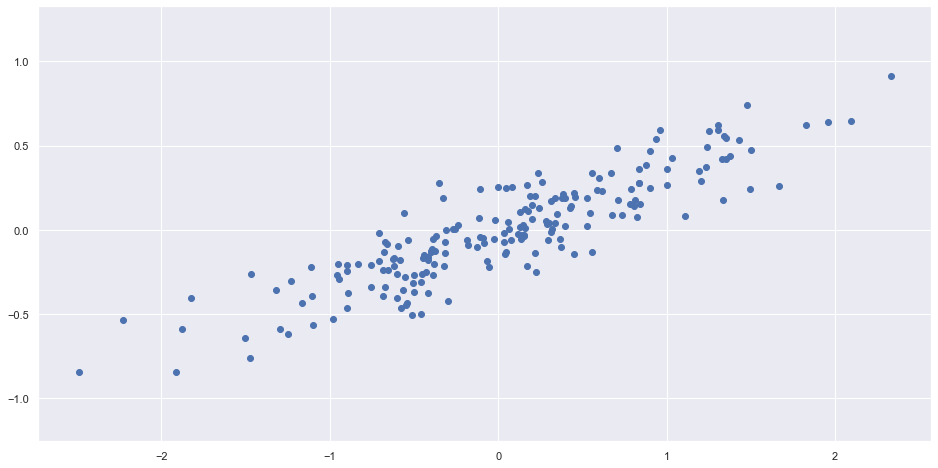

In [2]:
# data creation

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

By eye, it is clear that there is a nearly linear relationship between the x and y variables. WHen linear regression attepted to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, one quantifies this relationship by finding a list of the principal axes in the data, and using those axes to describe the dataset.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
# The fit learns some quantities from the data, most importantly the “components” and “explained variance”
print('Components:')
print(pca.components_)
print('Explained variance:')
print(pca.explained_variance_)

Components:
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Explained variance:
[0.7625315 0.0184779]


To see what these numbers mean, let’s visualize them as vectors over the input data, using the “components” to define the direction of the vector, and the “explained variance” to define the squared-length of the vector.

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.0044138302291827)

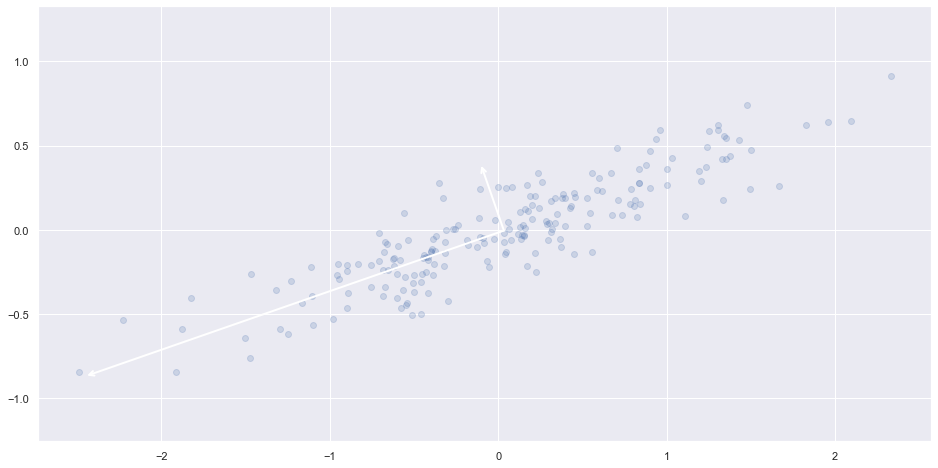

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

These vectors represent the principal axes of the data, and the length shown above is an indication of how “important” that axis is in describing the distribution of the data - more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the “principal components” of the data.

# PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [6]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape:    ', X.shape)
print('transformed shape: ', X_pca.shape)

original shape:     (200, 2)
transformed shape:  (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data.

(-2.731158226766438,
 2.6099018832593335,
 -0.9672765706389316,
 1.0060642308539949)

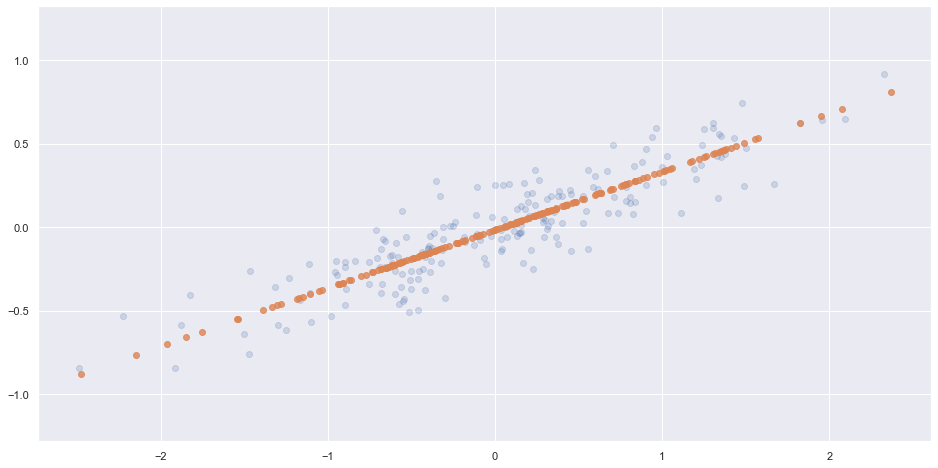

In [7]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in above chart) is roughly a measure of how much “information” is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses “good enough” to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points is mostly preserved.

# PCA for visualization: Handwritten digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when we look at high-dimensional data.

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions (like two).

In [9]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


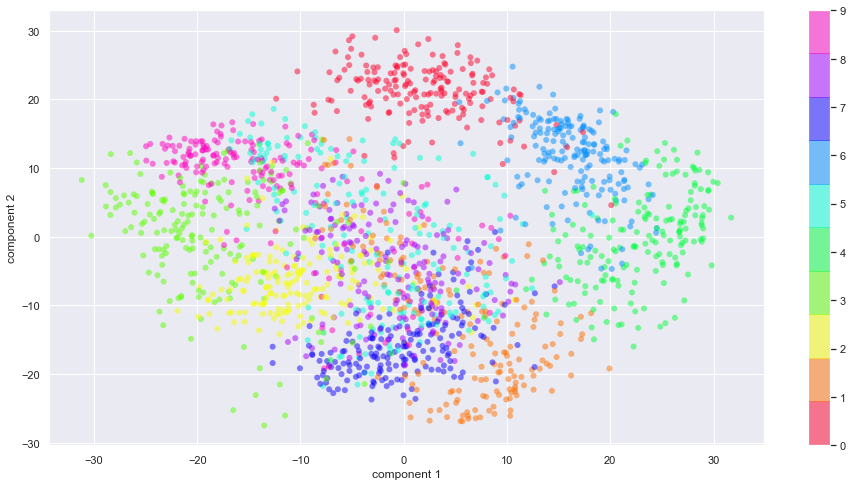

In [10]:
# We can plot the first two principal components of each point to learn about the data

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-
dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner — that is, without reference to the labels.

### What do the components mean?

Meaning of reduced dimensions can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector x:

$$ x = [x_{1}, x_{2}, x_{3}..., x_{64}] $$

One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$ image(x) = x_{1} · (pixel 1) + x_{2} · (pixel 2) + x_{3} · (pixel 3) · x_{64} · (pixel 64) $$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we’ve thrown out nearly 90% of the pixels!

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some predefined contribution from each pixel, and write something like:

$$ image(x) = mean + x_{1} · (basis 1) + x_{2} · (basis 2) + x_{3} · (basis 3) ... $$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-
dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. We can determine this by looking at the cumulative explained variance ratio as a function of the number of components

Text(0, 0.5, 'cumulative explained variance')

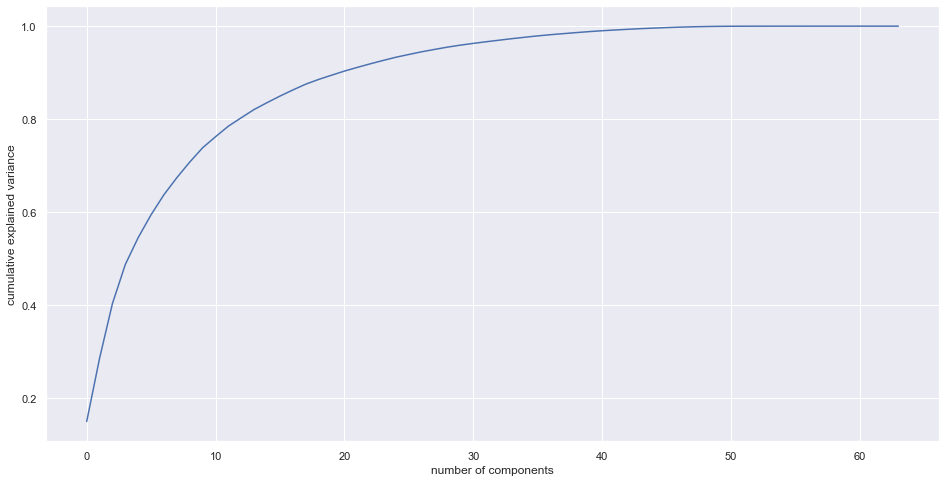

In [11]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50
components to describe close to 100% of the variance. Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we’d need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

# PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

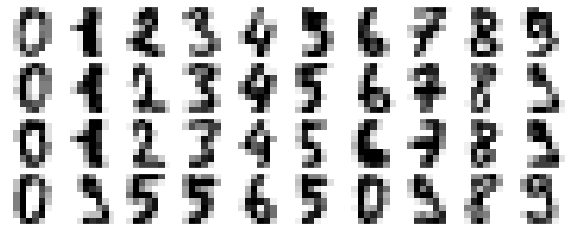

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(digits.data)

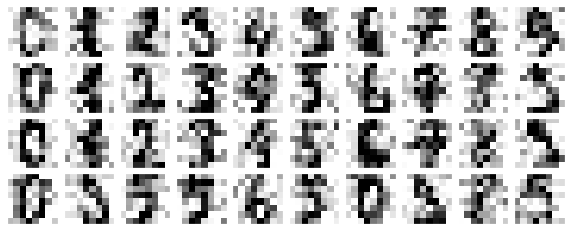

In [14]:
# adding random noise to create noisy dataset and replotting

np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [16]:
# training PCA on noisy data, requesting that projection preserve 50% of the variance

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits.

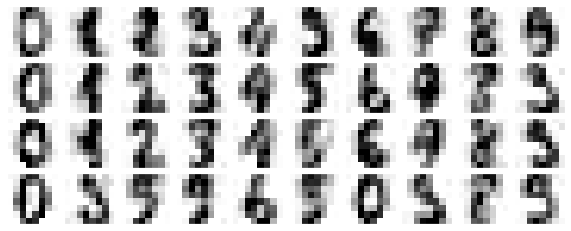

In [17]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

###  Additional Info

PCA’s main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA. RandomizedPCA uses a nondeterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term that serves to enforce sparsity of the components.